In [2]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import numpy as np
import yt
import matplotlib.pyplot as plt
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.utilities import utilities
import deepdish as dd
import glob

from collections import OrderedDict

In [3]:
wdir = '/home/aemerick/work/enzo_runs/'

comparison = OrderedDict()
comparison['Fiducial'] = (wdir + 'sn_H2atten_H2sh/', 'Fiducial', '-')
comparison['Shortrad'] = (wdir + 'sn_H2atten_H2_shortrad/', 'Shortard', '--')
comparison['NORT']     = (wdir + 'sn_H2atten_H2_noion/', 'No RT', '-.')


In [4]:
from galaxy_analysis.plot import plot_mass_loading_comparison as pmlc
rc('font',size=22)

pmlc.plot_mass_loading_comparison(work_dir = '', output_dir = './rad_comparison/',
                                  comparison = comparison, rbin = 2, ylim = (1.0E-6, 0.1)) #, ylim = (1.0E-5, 5.0E-3))

--- 633 633
--- (633,) (633,)
--- 351 351
--- (351,) (351,)
--- 69 69
--- (69,) (69,)
631 12
349 7
66 1
631 631


/home/aemerick/code/galaxy_analysis/plot/plot_mass_loading_comparison.py:135: RuntimeWarning: divide by zero encountered in divide
  yplot = Mdot[:,rbin] / SFR_func(t)
/home/aemerick/code/galaxy_analysis/plot/plot_mass_loading_comparison.py:146: RuntimeWarning: divide by zero encountered in divide
  ax.plot(t-t[0],Mdot[:,5]/SFR_func(t), lw = line_width, ls = '--', color = color[sim])#, label = sim)


349 349
66 66


In [2]:
from galaxy_analysis.method_paper_plots import mass_outflow

mass_outflow.plot_basic_outflow_and_loading(work_dir = comparison['Fiducial'][0], outdir = './')

NameError: name 'comparison' is not defined

In [5]:
from galaxy_analysis.method_paper_plots import metal_retention_resolution

metal_retention_resolution.plot_metal_retention_resolution(work_dir = '', 
                                                           output_dir = './rad_comparison/', 
                                                           comparison = comparison)


In [6]:
from galaxy_analysis.method_paper_plots import mass_plot
mass_plot.plot_mass_resolution(work_dir = '',
                               output_dir = './rad_comparison/',
                               comparison= comparison)

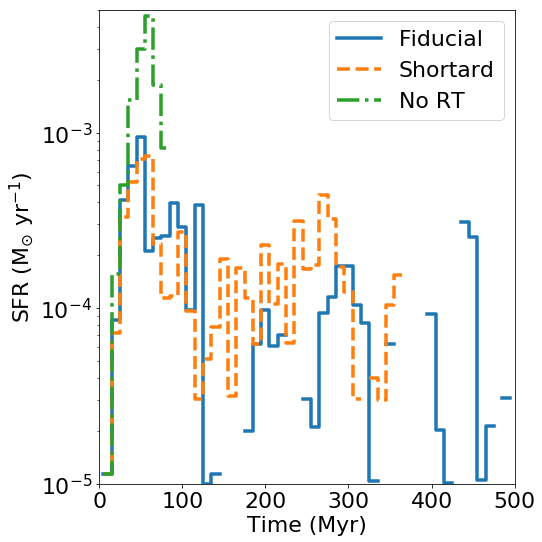

In [7]:
from galaxy_analysis.method_paper_plots import sfr_resolution

sfr_resolution.sfr_resolution(work_dir = '', output_dir = './rad_comparison/',
                              comparison = comparison, ylim = (1.0E-5, 5.0E-3))

KeyError: ('gas', 'cell_mass')

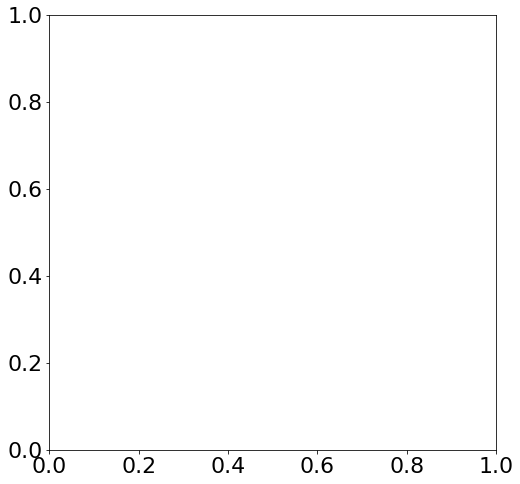

IndentationError: unexpected indent (metal_retention_resolution.py, line 34)

In [15]:
def plot_phase_comparison(comparison, plot_log = True):
    dirs = {}
    labels = {}
    lstyle = {}
    for k in comparison.keys():
        dirs[k]   = comparison[k][0]
        labels[k] = comparison[k][1]
        lstyle[k] = comparison[k][2]
        
        
    all_data = {}
    for k in labels.keys():
        all_data[k] = {}
    
        
        dl, t = utilities.select_data_by_time(dir = dirs[k], tmin = 0.0, tmax = 700.0)
        all_data[k]['time'] = t - t[0]
        for weight in ['mass','volume']:
            all_data[k][weight] = {}
            
            for phase in ['CNM','WNM','WIM','HIM']:
            
                field = '/gas_meta_data/' + weight + '_fractions' + '/' + phase 
                all_data[k][weight][phase] = utilities.get_property(field, file_list = dl)
                
                # gonna log this later --- fix the zeros
                all_data[k][weight][phase][ all_data[k][weight][phase] == 0.0] = 1.0E-99
                if plot_log:
                    all_data[k][weight][phase] = np.log10(all_data[k][weight][phase])
                
    fig, ax = plt.subplots(2,4)
    fig.set_size_inches(24,12)    
    for k in all_data.keys():
        
        temp = all_data[k]
        
        f = 'CNM'
        ax[(0,0)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,0)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'WNM'
        ax[(0,1)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,1)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'WIM'
        ax[(0,2)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,2)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        
        f = 'HIM'        
        ax[(0,3)].plot(temp['time'], temp['mass'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])
        ax[(1,3)].plot(temp['time'], temp['volume'][f], lw = 3,
                       color = color_dict[f], ls = lstyle[k])

    for a1 in ax:
        for a2 in a1:
            a2.set_xlabel(r'Time (Myr)')
            a2.set_ylabel(r'Fraction')
            a2.set_xlim(0.0,500.0)
            if plot_log:
                a2.set_ylim(-4,0)
            else:
                a2.set_ylim(0.0,1.0)
            #a2.semilogy()
    plt.tight_layout()
    
    log_str = ''
    if plot_log:
        log_str = '_logged'
    fig.savefig('./rad_comparison/phase_comparison' + log_str + '.png')
    

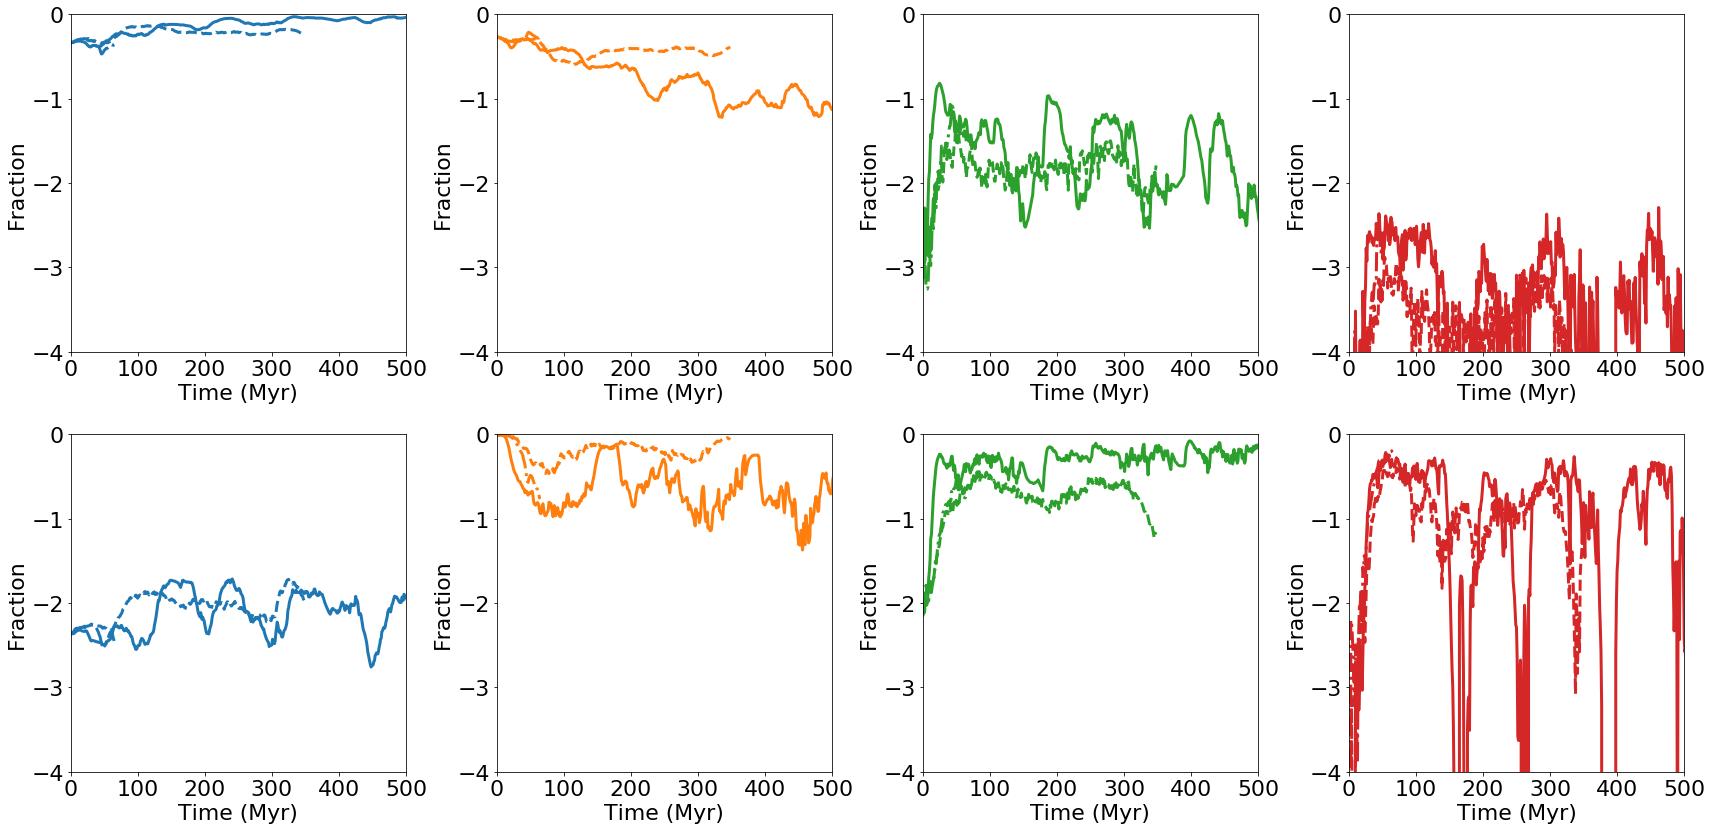

In [16]:
plot_phase_comparison(comparison)

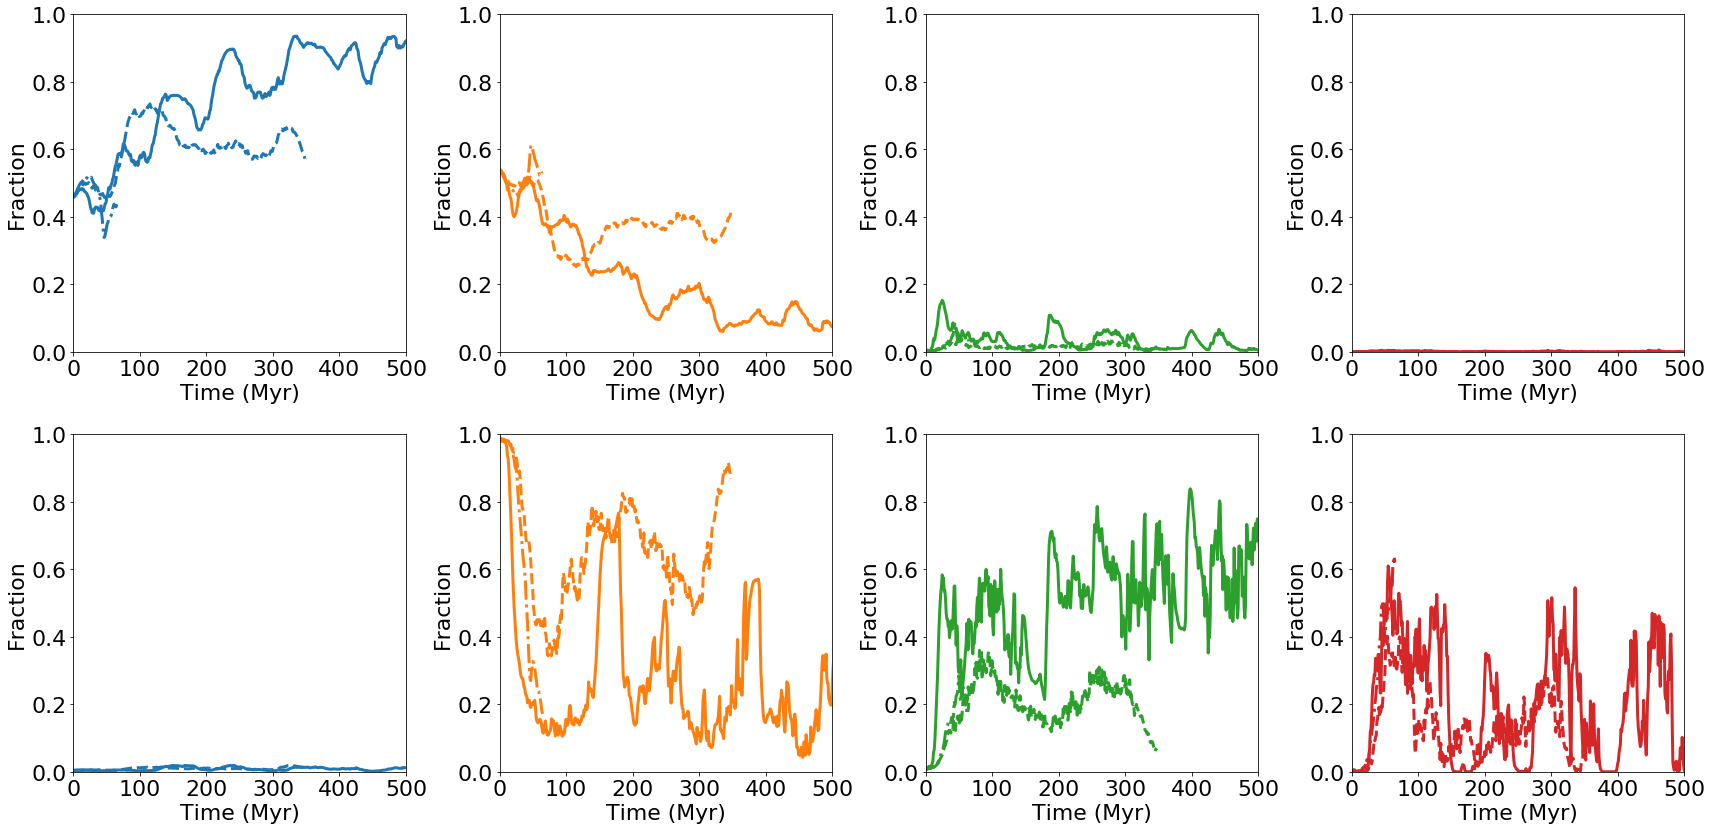

In [17]:
plot_phase_comparison(comparison,plot_log=False)

In [18]:
gal = Galaxy('DD0619', wdir = '/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/')

Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 38290.89it/s]
/home/aemerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 42314.04it/s]
/home/aemerick/code/onezone/data_tables.py:90: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [73]:
def _ion_fraction(field, data):
    return data['H_p1_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])
def _neutral_fraction(field,data):
    return data['H_p0_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])

yt.add_field(("gas","ion_fraction"), function=_ion_fraction, units='')
yt.add_field(("gas","neutral_fraction"), function = _neutral_fraction, units = '')

nbin = 20

ds   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/DD0172/DD0172')
data = ds.all_data()
disk = ds.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
prof = yt.Profile1D(disk, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')
#prof.add_fields('ion_fraction')
#prof.add_fields('Temperature')
#prof.add_fields('number_density')

profv = yt.Profile1D(disk, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profv.add_fields('ion_fraction')
profv.add_fields('Temperature')
profv.add_fields('number_density')


Parsing Hierarchy : 100%|██████████| 2816/2816 [00:00<00:00, 46245.91it/s]


In [74]:
dssh   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2_shortrad/DD0172/DD0172')
datash = dssh.all_data()
disksh = dssh.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
profsh = yt.Profile1D(disksh, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')

#profsh.add_fields('ion_fraction')
#profsh.add_fields('Temperature')
#profsh.add_fields('number_density')


profvsh = yt.Profile1D(disksh, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profvsh.add_fields('ion_fraction')
profvsh.add_fields('Temperature')
profvsh.add_fields('number_density')

Parsing Hierarchy : 100%|██████████| 2638/2638 [00:00<00:00, 49694.92it/s]


In [75]:
dsnort   = yt.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2_noion/DD0172/DD0172')
datanort = dsnort.all_data()
disknort = dsnort.disk([0.5,0.5,0.5], [0,0,1], (0.5,'kpc'),(2,'kpc'))
profnort = yt.Profile1D(disknort, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_mass')
#profnort.add_fields('ion_fraction')
#profnort.add_fields('Temperature')
#profnort.add_fields('number_density')


profvnort = yt.Profile1D(disknort, 'magnitude_cylindrical_z', nbin, 0.0*yt.units.pc, 1000.0*yt.units.pc, False, weight_field='cell_volume')
profvnort.add_fields('ion_fraction')
profvnort.add_fields('Temperature')
profvnort.add_fields('number_density')

Parsing Hierarchy : 100%|██████████| 2801/2801 [00:00<00:00, 41665.32it/s]


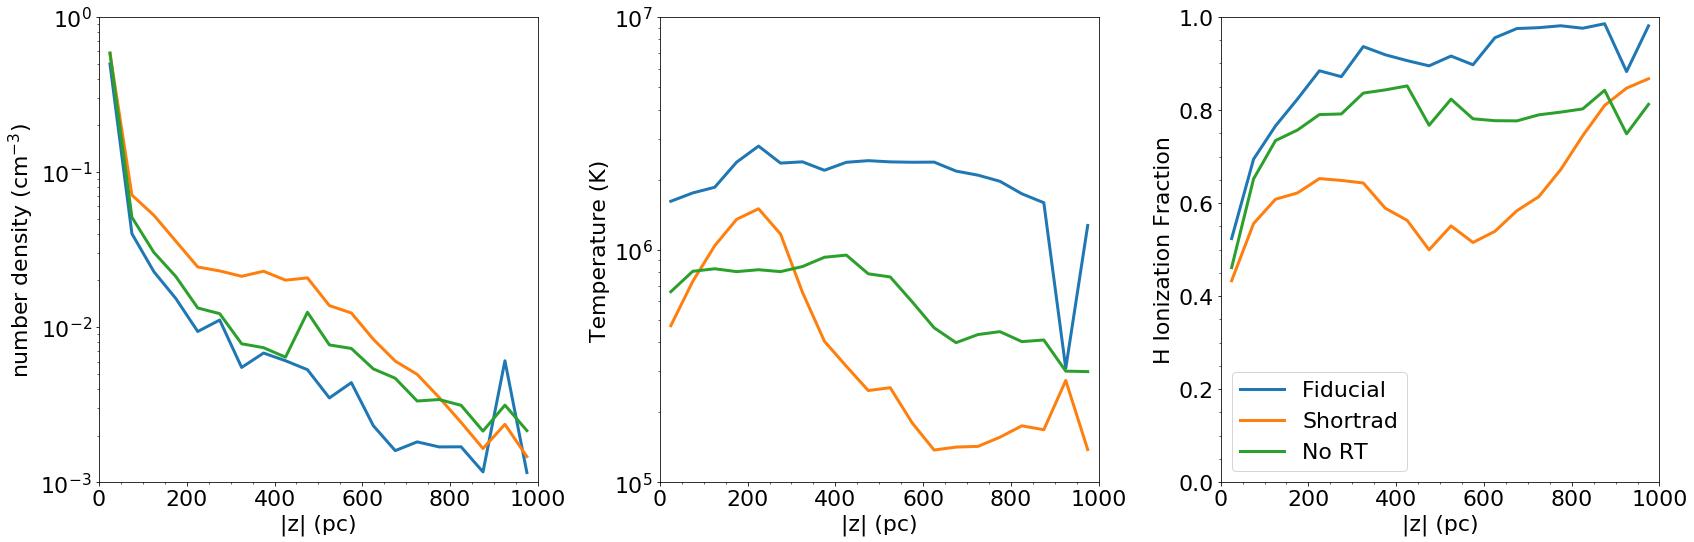

In [81]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

#ax[0].plot(prof.x.to('pc'), prof['number_density'], lw = 3, color = 'C0', ls = '-')
ax[0].plot(profv.x.to('pc'), profv['number_density'], lw = 3, color = 'C0', ls = '-')
#ax[0].plot(profsh.x.to('pc'), profsh['number_density'], lw = 3, color = 'C1', ls = '-')
ax[0].plot(profvsh.x.to('pc'), profvsh['number_density'], lw = 3, color = 'C1', ls = '-')
ax[0].plot(profvnort.x.to('pc'), profvnort['number_density'], lw = 3, color = 'C2', ls = '-')

ax[0].semilogy()

#ax[1].plot(prof.x.to('pc'), prof['Temperature'], lw = 3, color = 'C0', ls = '-')
ax[1].plot(profv.x.to('pc'), profv['Temperature'], lw = 3, color = 'C0', ls = '-')
#ax[1].plot(profsh.x.to('pc'), profsh['Temperature'], lw = 3, color = 'C1', ls = '-')
ax[1].plot(profvsh.x.to('pc'), profvsh['Temperature'], lw = 3, color = 'C1', ls = '-')
ax[1].plot(profvnort.x.to('pc'), profvnort['Temperature'], lw = 3, color = 'C2', ls = '-')

ax[1].semilogy()

#ax[2].plot(prof.x.to('pc'), prof['ion_fraction'], lw = 3, color = 'C0', ls = '-')
ax[2].plot(profv.x.to('pc'), profv['ion_fraction'], lw = 3, color = 'C0', ls = '-', label = 'Fiducial')
#ax[2].plot(profsh.x.to('pc'), profsh['ion_fraction'], lw = 3, color = 'C1', ls = '-')
ax[2].plot(profvsh.x.to('pc'), profvsh['ion_fraction'], lw = 3, color = 'C1', ls = '-', label = 'Shortrad')
ax[2].plot(profvnort.x.to('pc'), profvnort['ion_fraction'], lw = 3, color = 'C2', ls = '-', label = 'No RT')

ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()


ax[2].legend(loc='best')

ax[0].set_xlabel(r'|z| (pc)')
ax[1].set_xlabel(r'|z| (pc)')
ax[2].set_xlabel(r'|z| (pc)')
ax[0].set_xlim(0.0, 1000.0)
ax[1].set_xlim(0.0, 1000.0)
ax[2].set_xlim(0.0, 1000.0)

ax[0].set_ylim(0.001,1.0)
ax[1].set_ylim(1.0E5, 1.0E7)
ax[2].set_ylim(0.0,1.0)

ax[0].set_ylabel(r'number density (cm$^{-3}$)')
ax[1].set_ylabel(r'Temperature (K)')
ax[2].set_ylabel(r'H Ionization Fraction')
plt.tight_layout()

fig.savefig("./rad_comparison/density_temperature_ionization_z_profile.png")
